# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [50]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [51]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-06-27 downloaded.
kospi200_prices_250627.csv saved
df_prices updated
Execution time of download: 28 secs


## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-06-25 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-06-27 downloaded.
etfs_weather_250627.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## ETF

In [14]:
tickers = [
    '261240', '292560'
]

In [15]:
etf = PM.create_universe('UV_ETF')

2 securities from 2022-01-03 to 2025-06-25 uploaded.
Price data loaded


In [16]:
etf.get_names('selected')

0) 292560: TIGER 일본엔선물
1) 261240: KODEX 미국달러선물

In [17]:
#PM.review_universe('UV_WTR')

In [18]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers
    #tickers = 'selected'
)
etf.download(**kw) if WidgetUniverse.values(0) else None

... done
2 securities from 2022-01-03 to 2025-06-27 downloaded.
etfs_all_250627.csv saved
df_prices updated
Execution time of download: 0 secs


## FUND

In [6]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

32 securities from 2023-03-29 to 2025-06-27 uploaded.
Master data for 324 funds loaded.
Price data loaded


In [87]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [88]:
# FISA
tickers += ['K55105CH3411', 'K55223BU8809', 'K55105BU7648', 'K55301BX0493', 'K55235CI9634',
            'K55306BT9453', 'K55236BG3001', 'K55101E95114', 'K55101E95247', 'K55235B96163', 'KR5235AK9691']
len(tickers)

35

In [89]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 324 funds loaded.
34 tickers set to download


100%|███████████████████████████████████████████████████████████████| 34/34 [00:52<00:00,  1.55s/it]

2 tickers failed for conversion
... done
32 securities from 2023-03-29 to 2025-06-27 downloaded.
funds_prices_250627.csv saved
df_prices updated
Execution time of download: 53 secs


In [71]:
_ = fund.save()

funds_prices_250627.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [64]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210BR6480,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6522,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105BC8507,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55105BC8523,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ce,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55235CI9634,피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e,기업은행,퇴직연금,피델리티,주식,주식,인도


In [65]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [66]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [67]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

0

In [68]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [69]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.44it/s]

1.0 secs elapsed, 0.0 secs paused (0.0%)


### Monthly

In [111]:
fund = PM.create_universe('UV_FNDM')

315 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [74]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [75]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250620.csv loaded
28 securities from 2023-03-29 to 2025-06-19 uploaded.
Master data for 324 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [77]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

28 securities from 2023-03-29 to 2025-06-19 uploaded.
Master data for 324 funds loaded.
Price data loaded
Master data for 324 funds loaded.
Cost data transaction_cost_250514.csv loaded
Cost data saved to transaction_cost_250620.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

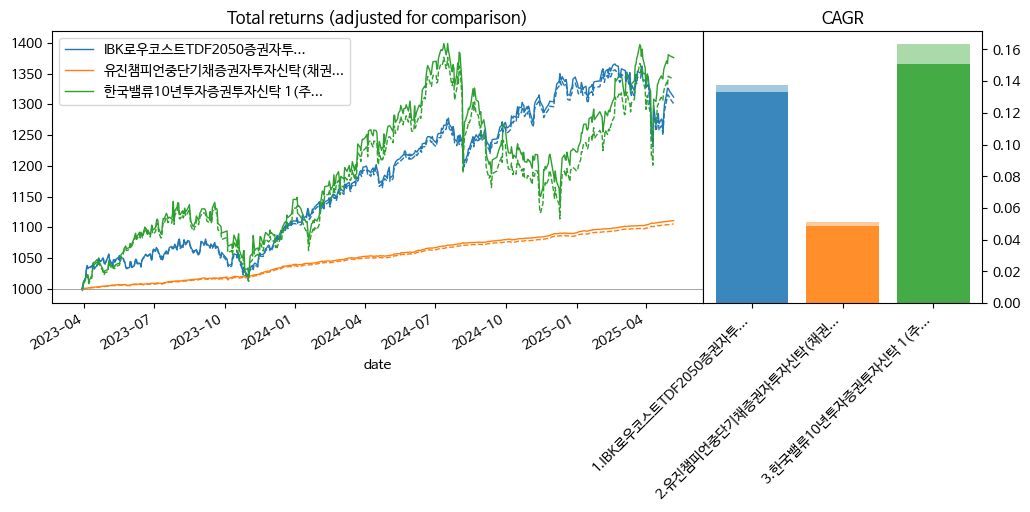

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## FCTR

In [12]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2022-01-03 to 2025-03-25 uploaded.
ERROR: Failed to get ticker names as Too Many Requests. Rate limited. Try after a while.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## LIQ

In [13]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [16]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded


In [17]:
#liq.get_names()

In [19]:
kw = dict(
    n_years = 3, 
    tickers = selected, #selected,
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

ERROR: Failed to get ticker names
Execution time of download: 11 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [43]:
WidgetUniverse

In [44]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [45]:
start_fr = '2024-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:13<00:00,  2.17s/it]

7.2 mins elapsed, 16.0 secs paused (3.7%)
Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 downloaded
kospi200_ratios_250627.csv saved


In [9]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [10]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-09
Price: 2022-01-03 ~ 2025-05-09


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per2_250509.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [28]:
#pm.load('LIQ')
pm.load(pf_srt, pf_sds, pf_fxm)

SRT: imported
SDS: imported
FXM: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


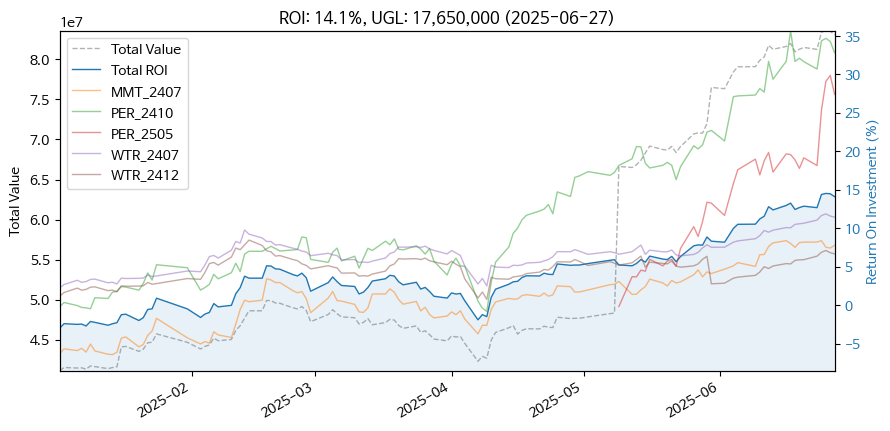

In [6]:
start_date='2025-01-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [7]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [8]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18
end,2025-06-27,2025-06-27,2025-06-27,2025-06-27,2025-06-27,2025-06-27
buy,"69,808,056","16,472,520","17,985,321","10,364,836","10,516,562","125,147,296"
sell,"56,214,884","2,617,050",0.0,"942,797",0.0,"59,774,732"
value,"19,024,302","19,261,650","22,912,614","10,606,808","11,216,796","83,022,170"
ugl,"5,431,130","5,406,180","4,927,293","1,184,770","700,234","17,649,606"
roi,0.0778,0.328,0.274,0.114,0.0666,0.141


In [9]:
pm.performance_stats()

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe


,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412
start,2024-07-23,2024-10-18,2025-05-12,2024-07-19,2024-12-19
end,2025-06-27,2025-06-27,2025-06-27,2025-06-27,2025-06-27
total_return,0.021219,0.320764,0.228541,0.114491,0.068505
cagr,0.02288,0.496665,4.125938,0.122355,0.135845
calmar,0.075958,5.588958,193.86191,1.84223,1.908502
max_drawdown,-0.301226,-0.088865,-0.021283,-0.066417,-0.071179
avg_drawdown,-0.106053,-0.020958,-0.011806,-0.012776,-0.010396
avg_drawdown_days,109.666667,8.952381,3.125,21.785714,17.222222
daily_vol,0.278361,0.212148,0.284936,0.081034,0.100723
daily_sharpe,0.227265,2.085798,5.842883,1.538928,1.398326


Custom category loaded: portfolio2


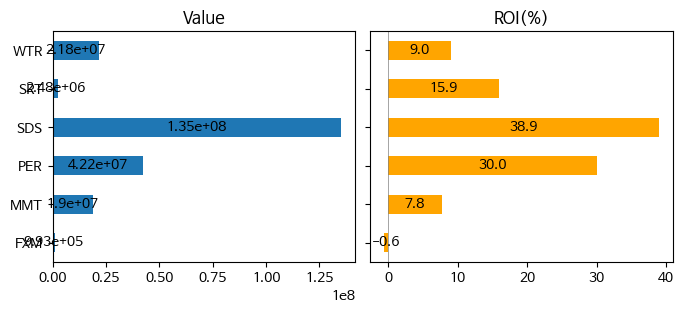

In [32]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*diversification metrics*

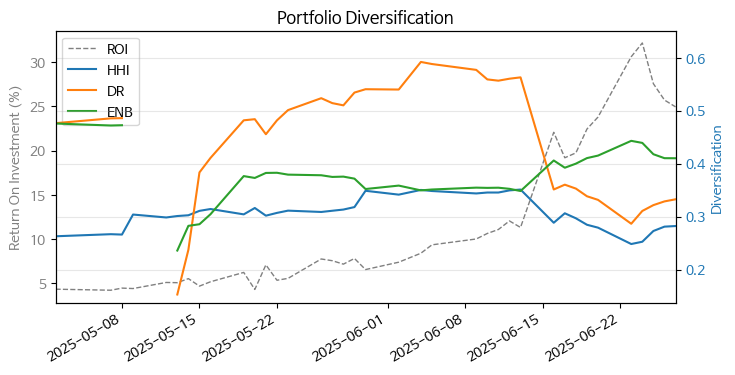

In [36]:
pfs = ['MMT', 'PER', 'WTR', 'SDS']
pm.diversification_history(*pfs, start_date='2025-05-01')

*print summary for google sheet 금융자산운용*

In [8]:
pm.util_print_summary(date=w_date.value)

2025-06-02, MMT, 2407, , , , 평가, , 61756350, 46784778, 17855971, 2884398, 0.0467
2025-06-02, PER, 2410, , , , 평가, , 12249374, 2617050, 10504989, 872665, 0.0712
2025-06-02, PER, 2505, , , , 평가, , 16292303, 0.0, 17685183, 1392880, 0.0855
2025-06-02, SRT, , , , 평가, , 2138820, 0.0, 2165987, 27167, 0.0127
2025-06-02, WTR, 2407, , , , 평가, , 10364836, 942797, 10202619, 780581, 0.0753
2025-06-02, WTR, 2412, , , , 평가, , 10516562, 0.0, 10816338, 299776, 0.0285


### All Funds

In [4]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [5]:
start_date='2024-07-01'
#pm.plot(start_date=start_date, roi=False)

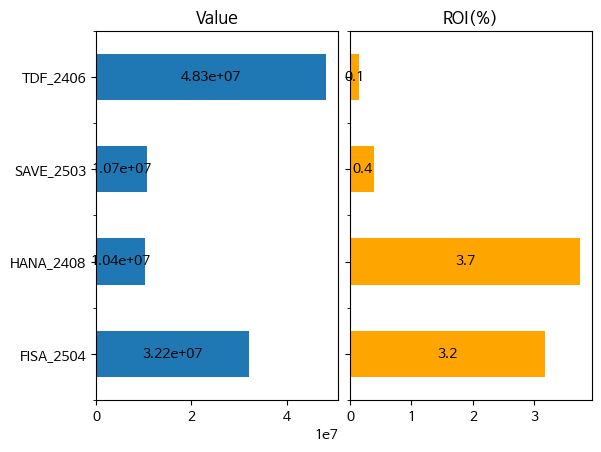

In [8]:
pm.summary(plot=True)

In [7]:
pm.performance_stats()

,TDF_2406,HANA_2408,SAVE_2503,FISA_2504
start,2024-06-20,2024-08-02,2025-03-18,2025-04-29
end,2025-06-27,2025-06-27,2025-06-27,2025-06-27
total_return,0.002223,0.03603,0.001875,0.033701
cagr,0.002183,0.040079,0.006797,0.227766
calmar,0.016449,2.233076,0.138992,71.80006
max_drawdown,-0.132689,-0.017948,-0.048899,-0.003172
avg_drawdown,-0.034474,-0.003405,-0.01748,-0.001011
avg_drawdown_days,48.285714,10.869565,23.75,3.142857
daily_vol,0.098712,0.023802,0.076162,0.025428
daily_sharpe,0.072407,1.746948,0.128815,8.660713


In [43]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
category = 'strategy'

Custom category loaded: account, asset, manager, region, seller, strategy


In [37]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)
category = 'name2'

Custom category loaded: name2


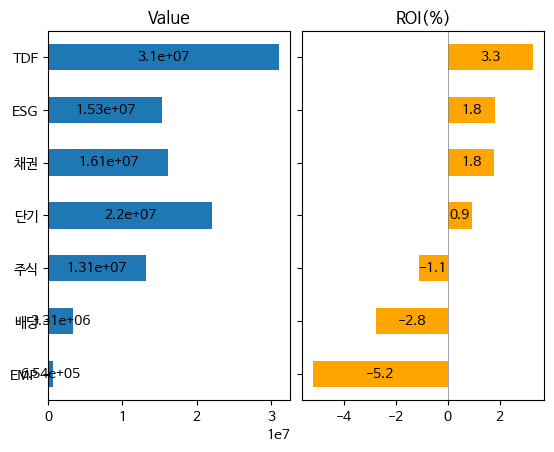

In [44]:
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

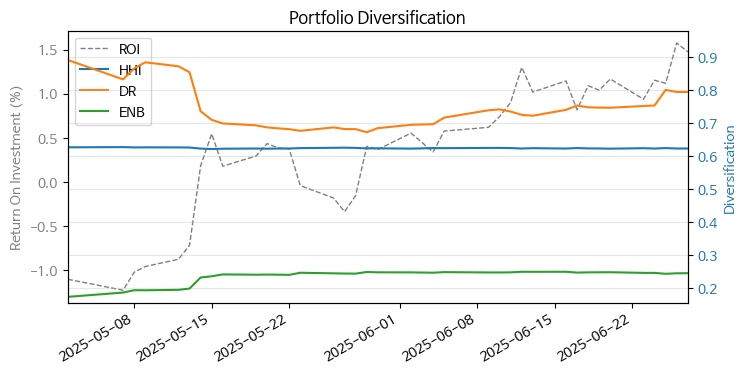

In [18]:
pm.diversification_history(start_date='2025-05-01')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Transaction

## MMT

In [19]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded


In [5]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

In [6]:
pf_mmt.view_record(-1, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2025-06-16 000150         두산  1.001672      3588000  3588000     0.2    0.184   
           000880         한화  1.001992      4016000  4016000     0.2    0.206   
           003230       삼양식품  1.001566     -3831000        0     0.0    0.000   
           012450  한화에어로스페이스  1.000000       -60256  3880000     0.2    0.199   
           042660       한화오션  1.002350     -3574200        0     0.0    0.000   
           064350       현대로템  1.002018     -1982000  3964000     0.2    0.203   
           329180    HD현대중공업  1.002232       448000  4032000     0.2    0.207   

                       date*  
date       ticker             
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17

*daily transactions for book keeping*

In [7]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

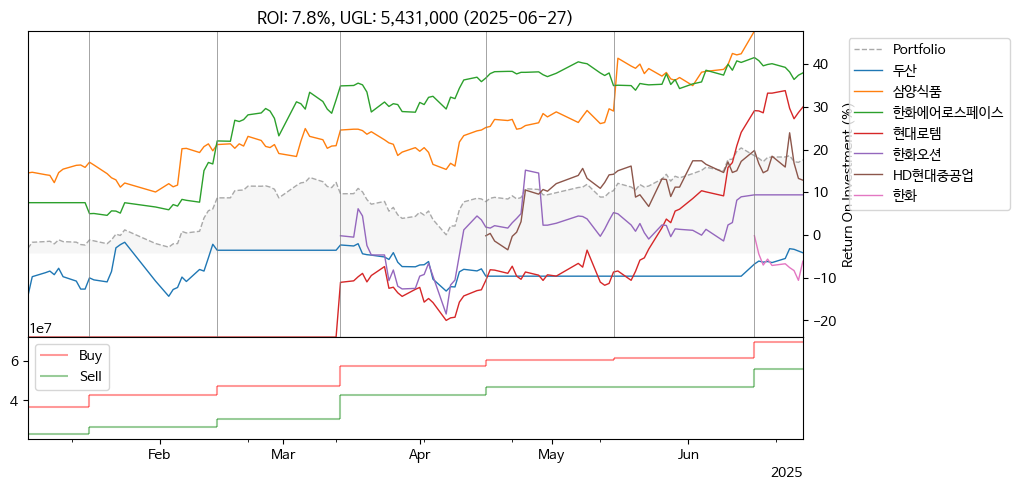

In [21]:
pf_mmt.plot(total=False, start_date='2025-01-01')

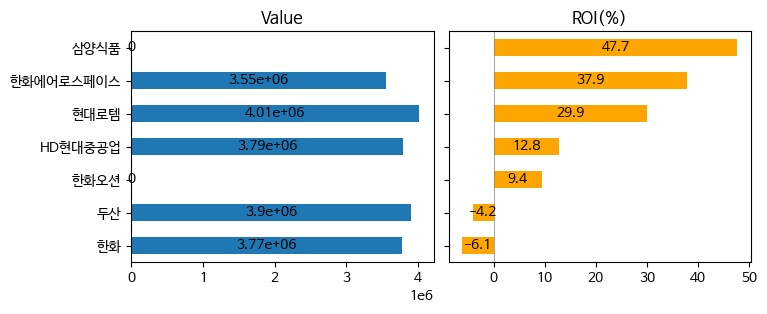

In [22]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

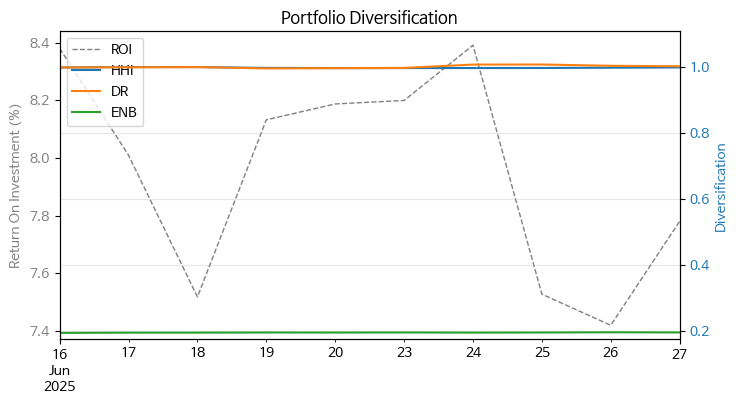

In [23]:
pf_mmt.diversification_history()

In [9]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-06-20, 69808056, 56214884, 19308770, 5715598, 0.0819


start    2024-07-22
end      2025-06-20
buy      69,808,056
sell     56,214,884
value    19,308,770
ugl       5,715,598
roi          0.0819
dtype: object

In [43]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [44]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [45]:
date_actual = '2025-07-17'
capital = WidgetTransaction.values(1)
#capital = -0.02
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-06-20 to 2025-06-20
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 3 %
Residual cash: 512,797
ROI: 7.4%, UGL: 5,424,316 (2025-06-27)
Set save=True to save transaction record


In [46]:
pf_mmt.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-06-27 000150         두산  651000           -6    0     0.0    0.000   
           000880         한화   94400            0   40     0.2    0.204   
           012450  한화에어로스페이스  890000            0    4     0.2    0.192   
           064350       현대로템  201000           -2   18     0.2    0.195   
           272210      한화시스템   59300           64   64     0.2    0.205   
           329180    HD현대중공업  422000            0    9     0.2    0.205   

                       date*  
date       ticker             
2025-06-27 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           064350 2025-07-17  
           272210 2025-07-17  
           329180 2025-07-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [18]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 loaded


In [19]:
pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
#pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [15]:
# run after editting record file
#pf_per.update_record()

In [20]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.035   
           003030   세아제강지주  193300           -4    2    0.05    0.028   
           009970  영원무역홀딩스   85700           -6    5    0.05    0.031   
           016380     KG스틸    1012         -508  495    0.05    0.036   
           047040     대우건설    3635         -127  140    0.05    0.037   
           088350     한화생명    2865          180  180    0.05    0.037   
           078930       GS   41600           12   12    0.05    0.036   
           111770     영원무역   40150           12   12    0.05    0.035   
           139130  DGB금융지주    8250           63   63    0.05    0.038   
           005830   DB손해보험  106900            4    4    0.05    0.031   
           001450     현대해상   29750           17   17    0.05    0.037   
           009900     명신산업     991          500  500    0.05    0.036   
           241560     두산밥캣   40000           13   13    0.05    0.038   
           000270       기아   93600            5    5    0.05    0.034   
           024110     기업은행   14570           35   35    0.05    0.037   
           005850      에스엘   31350           16   16    0.05    0.036   
           316140   우리금융지주   16080           32   32    0.05    0.037   
           138930  BNK금융지주    9430           55   55    0.05    0.037   
           005380      현대차  209500            2    2    0.05    0.030   
           017800   현대엘리베이   46400          100  100     NaN    0.335   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [49]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-06-27, 16472520, 2617050, 19261659, 5406189, 0.328


start    2024-10-17
end      2025-06-27
buy      16,472,520
sell      2,617,050
value    19,261,659
ugl       5,406,189
roi           0.328
dtype: object

In [50]:
#pf_per.update_record()
#pf_per.view_record(-2)

security_names updated
Data of tickers 009900, 016380 downloaded


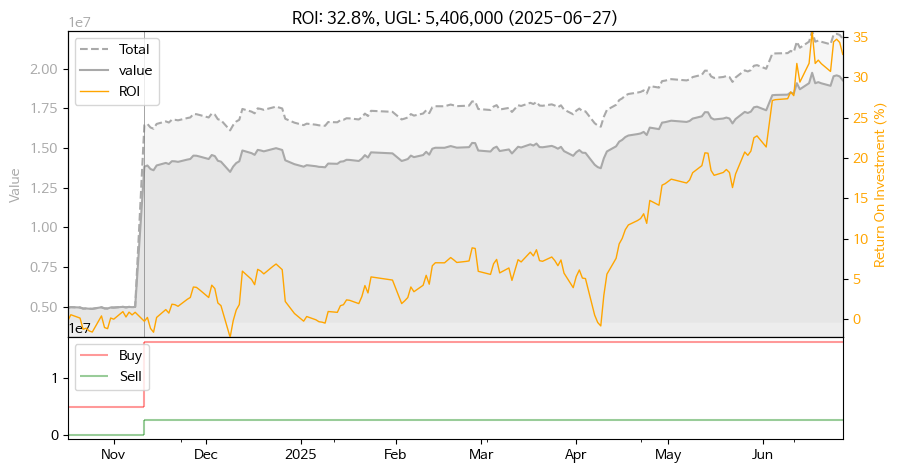

In [21]:
pf_per.plot()

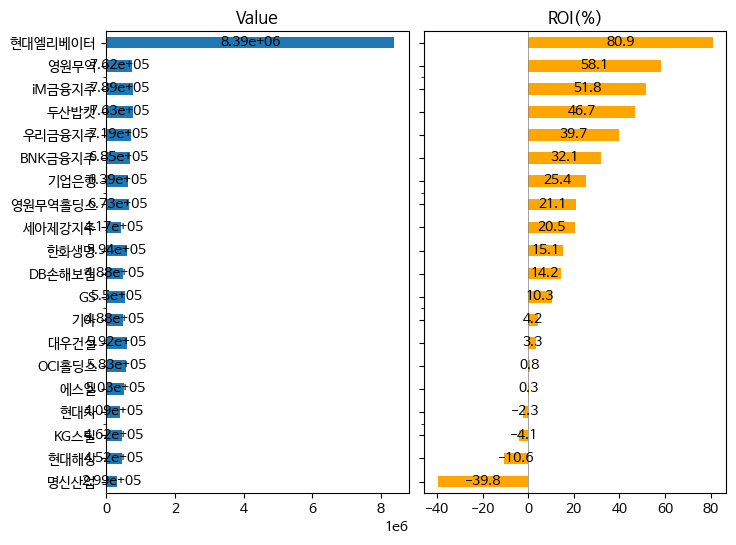

In [52]:
_ = pf_per.plot_assets(figsize=(8,6))

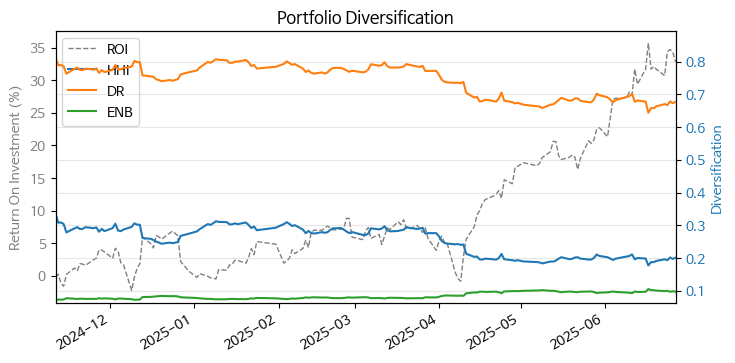

In [53]:
pf_per.diversification_history()

In [54]:
#_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [55]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

In [27]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-04-28 to 2025-06-27
Weights of tickers determined by Equal weights.
Rebalancing with contribution 3,000,000
Mean absolute error of weights: 2 %
Tickers 009900, 016380 added to universe
Deployed capital: 2,141,195
ROI: 16.3%, UGL: 5,612,785 (2025-06-27)
Set save=True to save transaction record


In [28]:
pf_per.view_record(-1, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-06-27 000270          기아    97700            6   11    0.05    0.050   
           000720        현대건설    78800           14   14    0.05    0.051   
           001450        현대해상    26650           24   41    0.05    0.050   
           003030      세아제강지주   209000           -2    0    0.00    0.000   
           003240        태광산업  1103000            1    1    0.05    0.051   
           004020        현대제철    30200           36   36    0.05    0.050   
           005380         현대차   205000            3    5    0.05    0.047   
           005830      DB손해보험   122300            5    9    0.05    0.051   
           005850         에스엘    31500           19   35    0.05    0.051   
           007340     DN오토모티브    22150           50   50    0.05    0.051   
           008770        호텔신라    51500           21   21    0.05    0.050   
           009900        명신산업     1000         -500    0    0.00    0.000   
           009970     영원무역홀딩스   134800            3    8    0.05    0.050   
           010060      OCI홀딩스    73000           -8    0    0.00    0.000   
           010950       S-Oil    58200           19   19    0.05    0.051   
           016380        KG스틸     1014         -495    0    0.00    0.000   
           017800     현대엘리베이터    84100         -100    0    0.00    0.000   
           018880       한온시스템     3125          356  356    0.05    0.051   
           023530        롯데쇼핑    74500           14   14    0.05    0.048   
           024110        기업은행    18300          -35    0    0.00    0.000   
           036460      한국가스공사    39850           27   27    0.05    0.050   
           047040        대우건설     4240         -140    0    0.00    0.000   
           051910        LG화학   209000            5    5    0.05    0.048   
           078930          GS    45950          -12    0    0.00    0.000   
           088350        한화생명     3305          157  337    0.05    0.051   
           096770     SK이노베이션    97800           11   11    0.05    0.050   
           111770        영원무역    63600          -12    0    0.00    0.000   
           138930     BNK금융지주    12480          -55    0    0.00    0.000   
           139130      iM금융지주    12550          -63    0    0.00    0.000   
           241560        두산밥캣    58800          -13    0    0.00    0.000   
           316140      우리금융지주    22500          -32    0    0.00    0.000   
           361610  SK아이이테크놀로지    26650           41   41    0.05    0.050   
           402340       SK스퀘어   176300            6    6    0.05    0.049   

                       date*  
date       ticker             
2025-06-27 000270 2025-11-12  
           000720 2025-11-12  
           001450 2025-11-12  
           003030 2025-11-12  
           003240 2025-11-12  
           004020 2025-11-12  
           005380 2025-11-12  
           005830 2025-11-12  
           005850 2025-11-12  
           007340 2025-11-12  
           008770 2025-11-12  
           009900 2025-11-12  
           009970 2025-11-12  
           010060 2025-11-12  
           010950 2025-11-12  
           016380 2025-11-12  
           017800 2025-11-12  
           018880 2025-11-12  
           023530 2025-11-12  
           024110 2025-11-12  
           036460 2025-11-12  
           047040 2025-11-12  
           051910 2025-11-12  
           078930 2025-11-12  
           088350 2025-11-12  
           096770 2025-11-12  
           111770 2025-11-12  
           138930 2025-11-12  
           139130 2025-11-12  
           241560 2025-11-12  
           316140 2025-11-12  
           361610 2025-11-12  
           402340 2025-11-12

*New asset turnover*

In [29]:
pf_per.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-10-17,5.0,5.0,1.00
2024-11-11,15.0,20.0,0.75
2025-06-27,13.0,20.0,0.65


*Compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*Performance without old assets*

In [53]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

security_names updated
Data of tickers 001740, 178920 downloaded
Trading of assets 015760 to halt
Updated with transaction on 2025-06-24
Set save=True to save transaction record
ROI: 20.1%, UGL: 3,144,328 (2025-06-24)


start    2025-05-09
end      2025-06-24
buy      15,657,406
sell            0.0
value    18,801,734
ugl       3,144,328
roi           0.201
dtype: object

## WTR
*modified all weather*

In [31]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-02'

In [32]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr_static_250213.csv loaded


In [45]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [33]:
pf_wtr.view_record(-2, nshares=False)

name     ratio  transaction      net  \
date       ticker                                                         
2024-11-20 069500             KODEX 200  1.000000       231070  1617490   
           148070          KOSEF 국고채10년  0.999744      -117035  1521455   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1607410   
           284430        KODEX 200미국채혼합  0.999603        62925  1623464   
           379800      KODEX 미국S&P500TR  1.001064      -150320  1615940   
           411060            ACE KRX금현물  1.004401      -170400  1635840   
2025-02-13 069500             KODEX 200  0.991447        52641  1758990   
           148070         KIWOOM 국고채10년  0.997349       177132  1725450   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1639750   
           284430        KODEX 200미국채혼합  0.995416        65450  1754060   
           379800        KODEX 미국S&P500  0.992332        20215  1758705   
           411060            ACE KRX금현물  0.959900      -505365  1804875   

                   weight  weight*      date*  
date       ticker                              
2024-11-20 069500  0.1670    0.168 2024-11-20  
           148070  0.1670    0.158 2024-11-20  
           273130  0.1670    0.167 2024-11-20  
           284430  0.1670    0.169 2024-11-20  
           379800  0.1670    0.168 2024-11-20  
           411060  0.1670    0.170 2024-11-20  
2025-02-13 069500  0.1667    0.168 2025-02-14  
           148070  0.1667    0.165 2025-02-14  
           273130  0.1667    0.157 2025-02-14  
           284430  0.1667    0.168 2025-02-14  
           379800  0.1667    0.168 2025-02-14  
           411060  0.1667    0.173 2025-02-14

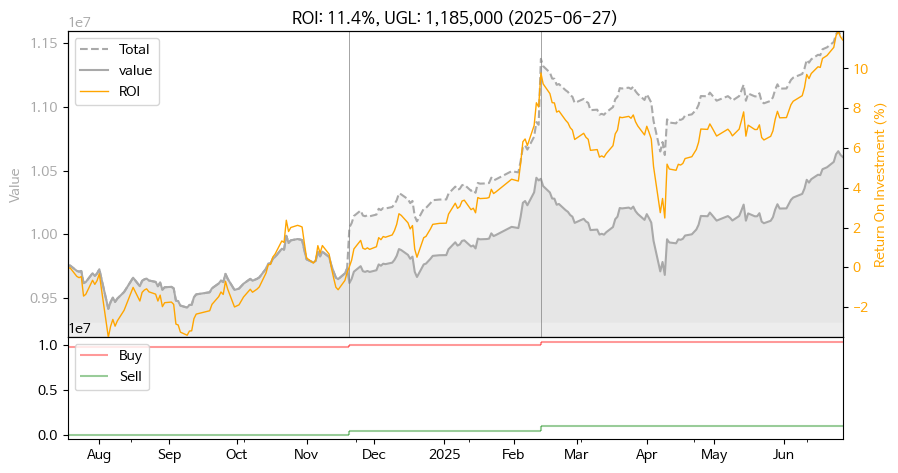

In [34]:
pf_wtr.plot(total=True)

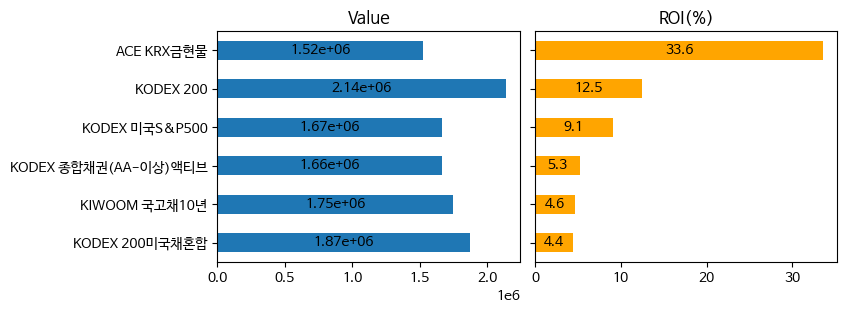

In [35]:
_ = pf_wtr.plot_assets(figsize=(8,3))

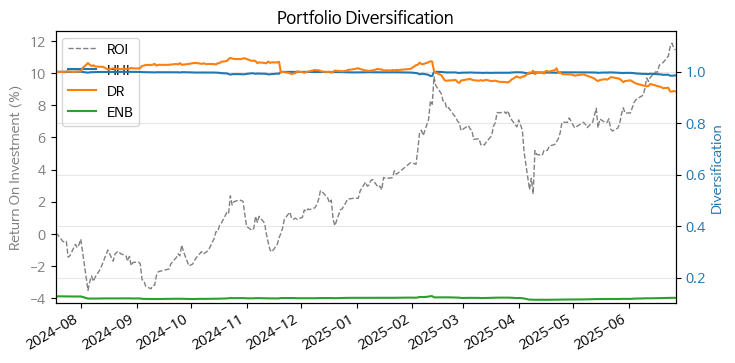

In [36]:
pf_wtr.diversification_history()

In [42]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-12-18, 2025-06-02, 10516562, 0.0, 10816341, 299779, 0.0285


start    2024-12-18
end      2025-06-02
buy      10,516,562
sell            0.0
value    10,816,341
ugl         299,779
roi          0.0285
dtype: object

In [36]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [37]:
#pf_wtr.performance_stats(metrics=METRICS)

In [37]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [42]:
capital = WidgetTransaction.values(1)
#capital = 0.8
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

6 tickers selected by Selected from 2025-06-27 to 2025-06-27
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 2 %
Residual cash: 176,962
ROI: 11.1%, UGL: 1,184,738 (2025-06-27)
Set save=True to save transaction record


In [43]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34061            2   52  0.1667   
           148070         KIWOOM 국고채10년  115030            2   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20154            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-06-27 069500             KODEX 200   41435          -10   42  0.1667   
           148070         KIWOOM 국고채10년  116635            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  118790            0   14  0.1667   
           284430        KODEX 200미국채혼합   13955           -8  126  0.1667   
           379800        KODEX 미국S&P500   19120            5   92  0.1667   
           411060            ACE KRX금현물   20310           12   87  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-06-27 069500    0.167 2025-08-14  
           148070    0.168 2025-08-14  
           273130    0.159 2025-08-14  
           284430    0.168 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.169 2025-08-14

In [44]:
pf_wtr.performance_stats()

,Realized,Simulated
start,2024-07-19,2022-01-03
end,2025-06-27,2025-06-27
total_return,0.110916,0.308592
cagr,0.118522,0.080355
calmar,1.784524,0.743865
max_drawdown,-0.066417,-0.108023
avg_drawdown,-0.013004,-0.014669
avg_drawdown_days,21.785714,40.068966
monthly_vol,0.051187,0.073693
monthly_sharpe,2.415428,1.278081


In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [25]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='WTR',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_srt_static_250602.csv loaded


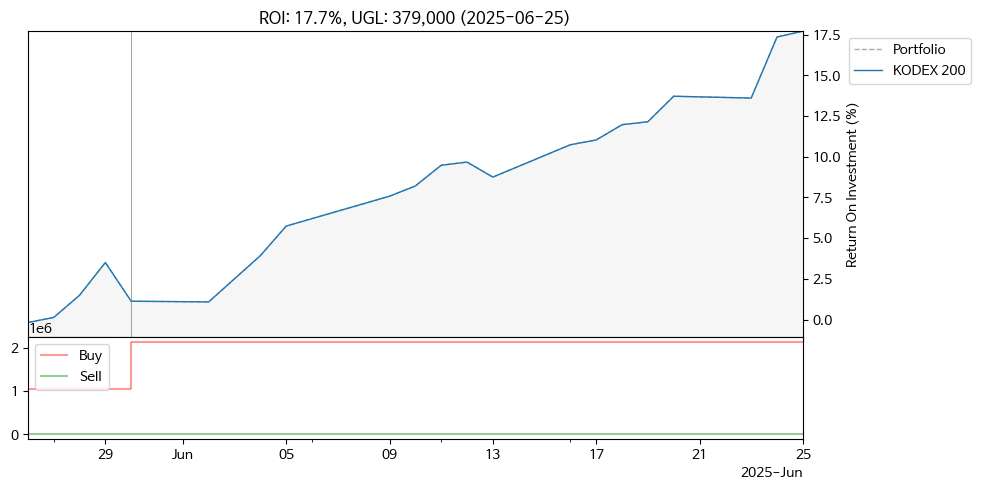

In [35]:
pf_srt.plot(total=False)

In [6]:
pf_srt.valuate()

start    2025-05-26
end      2025-06-09
buy       2,138,730
sell            0.0
value     2,300,747
ugl         162,017
roi          0.0758
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
date_actual = '2025-06-02'
kw = dict(
    buy = {'069500': 1082460}, 
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual = date_actual,
)
_ = pf_srt.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-02
All transactions saved to pf_srt_static_250602.csv
ROI: 1.1%, UGL: 24,074 (2025-06-02)


In [21]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-26,069500,KODEX 200,35190,30,30,1.0,1.0,2025-05-27
2025-05-30,069500,KODEX 200,36140,30,60,1.0,1.0,2025-06-02


## SDS

In [45]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='WTR',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_sds_static_250609.csv loaded


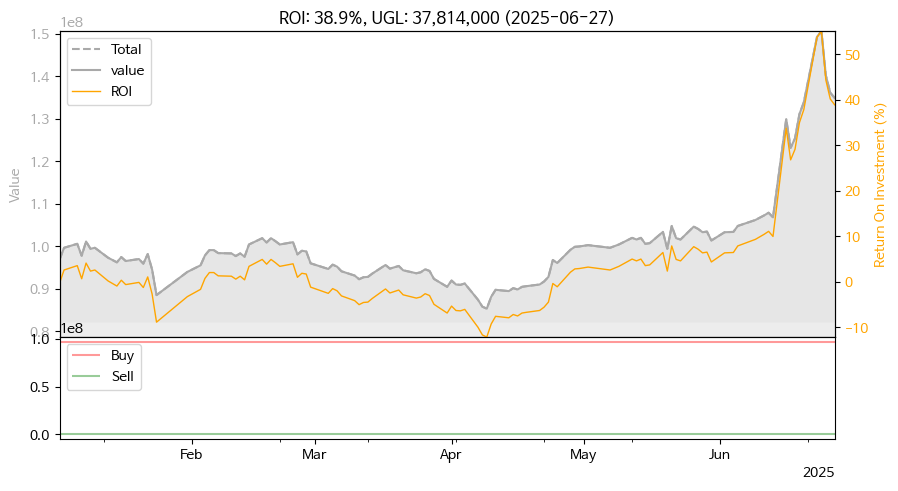

In [46]:
pf_sds.plot()

In [47]:
pf_sds.performance_stats()

,Realized,Simulated
start,2025-01-03,2022-01-03
end,2025-06-27,2025-06-27
total_return,0.353906,0.107348
cagr,0.882107,0.029736
calmar,5.421021,0.081966
max_drawdown,-0.16272,-0.362791
avg_drawdown,-0.052772,-0.130795
avg_drawdown_days,13.545455,209.333333
monthly_vol,0.520484,0.293094
monthly_sharpe,1.90898,0.342901


In [24]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [36]:
#capital = {'018260': 97110000} # = 780 * price on 2025-01-02
capital = {'018260': -20000000} # test sell

kw = dict(
    capital = capital,
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-11 to 2025-06-11
Weights of tickers determined by Specified.
Rebalancing with residual 20,000,000
Mean absolute error of weights: 0 %
Residual cash: 20,118,800
ROI: 0.8%, UGL: 895,309 (2025-06-11)
Set save=True to save transaction record


In [37]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-09,018260,삼성에스디에스,136400,780,780,1.0,1.0,2025-01-01
2025-06-11,018260,삼성에스디에스,137800,-146,634,1.0,1.0,2025-06-11


## FXM

In [27]:
kw = dict(
    file='pf_fxm_static', path=path_tran,
    universe='UV_ETF', strategy='WTR',
    **kw_cost
)
pf_fxm = PM.create_portfolio('FXM', **kw)

2 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [66]:
#pf_fxm.update_record()

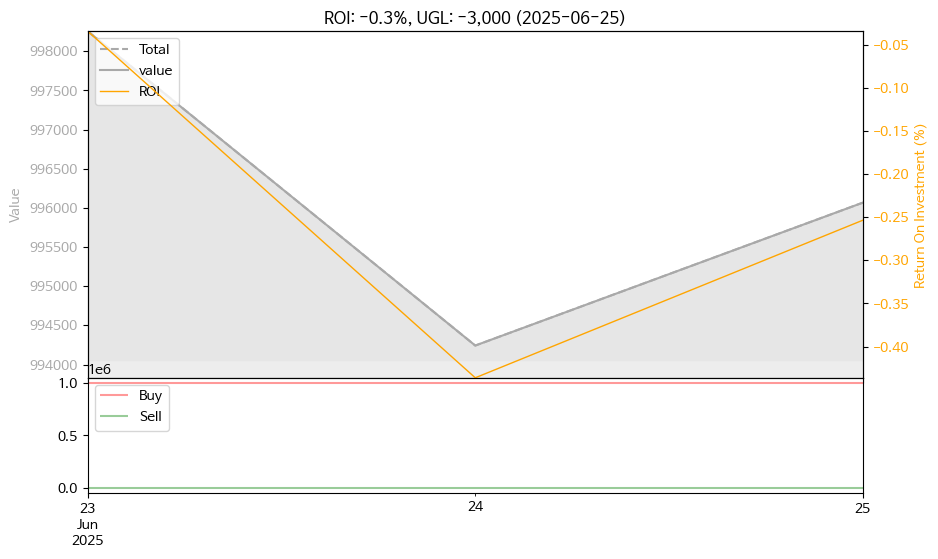

In [32]:
pf_fxm.plot()

In [41]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [70]:
#capital = WidgetTransaction.values(1)
capital = {'261240': 1e6}

kw = dict(
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    nshares = True
)
_ = pf_fxm.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-24 to 2025-06-24
Weights of tickers determined by Specified.
Rebalancing with contribution 1,000,000.0
Mean absolute error of weights: 0 %
Deployed capital: 994,625
ROI: -0.2%, UGL: -4,696 (2025-06-24)
Set save=True to save transaction record


In [71]:
pf_fxm.view_record(nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-23,261240,KODEX 미국달러선물,13680,73,73,1.0,1.0,2025-06-24
2025-06-24,261240,KODEX 미국달러선물,13625,73,146,1.0,1.0,2025-06-24


## LIQ

In [28]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_liq_static_250526.csv loaded


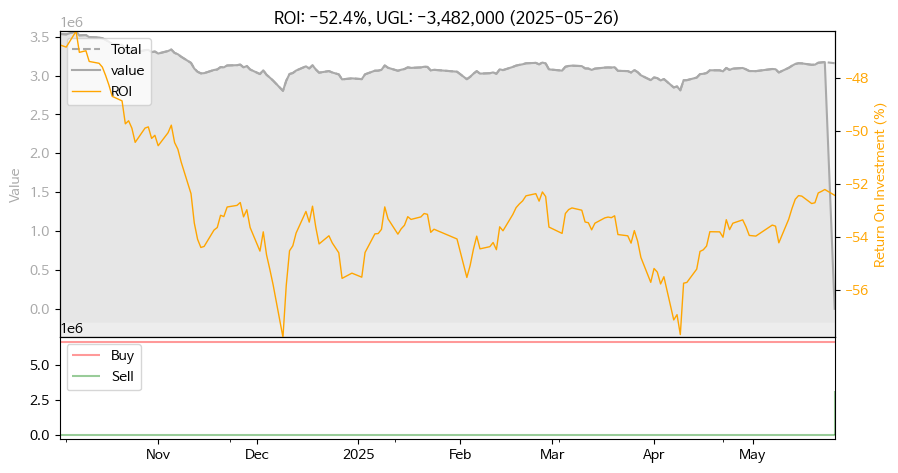

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

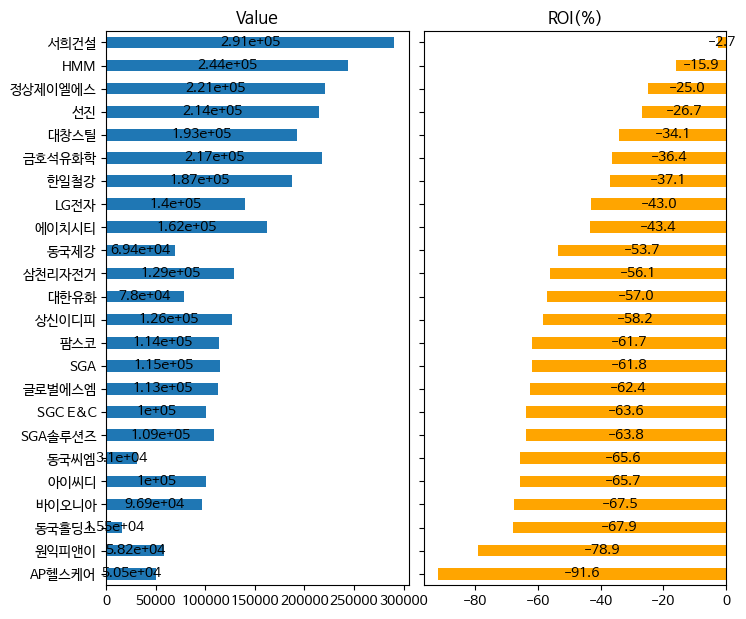

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [7]:
kw_st = dict(
    security_names = fund_names # need for new assets to buy
)

In [8]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

32 securities from 2023-03-29 to 2025-06-27 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_tdf_static_250421.csv loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [105]:
#pf_tdf.check_universe()

In [106]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

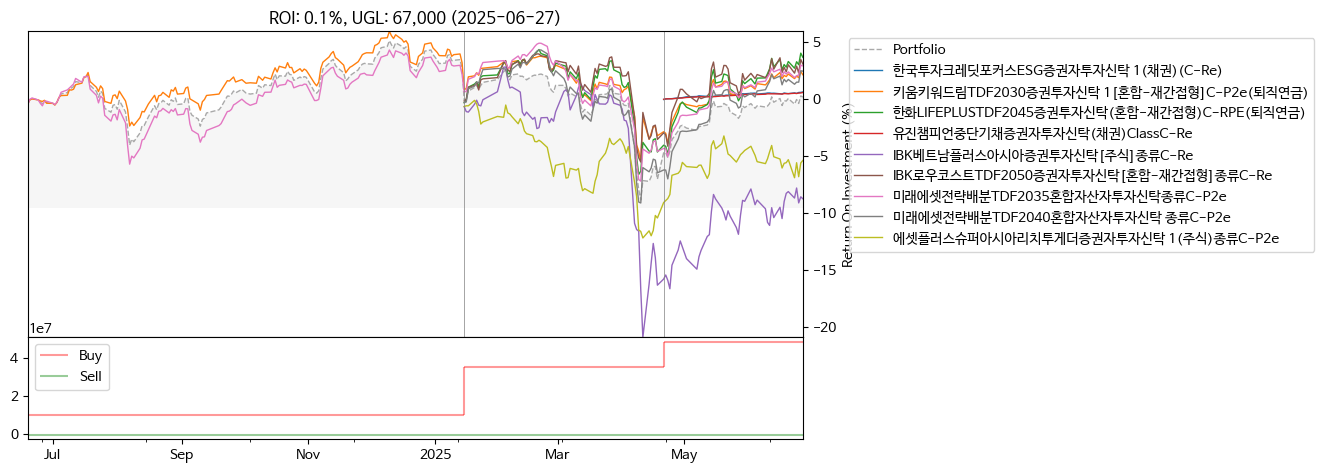

In [9]:
#start = '2025-01-01'
start = None
pf_tdf.plot(start, total=False, roi=True)

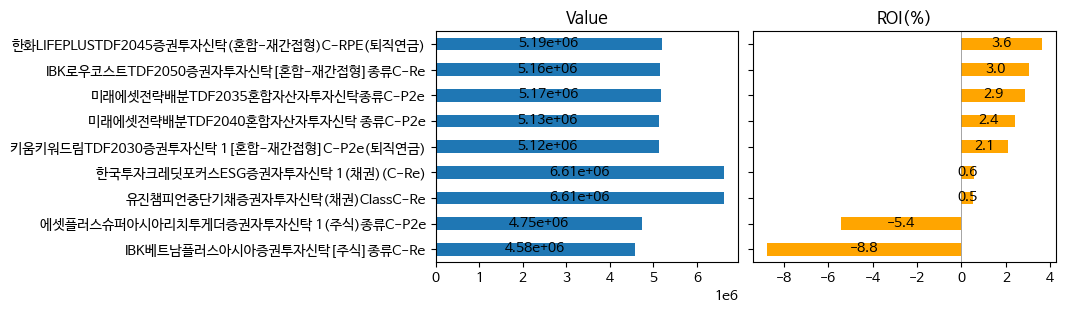

In [10]:
_ = pf_tdf.plot_assets(figsize=(8,3))

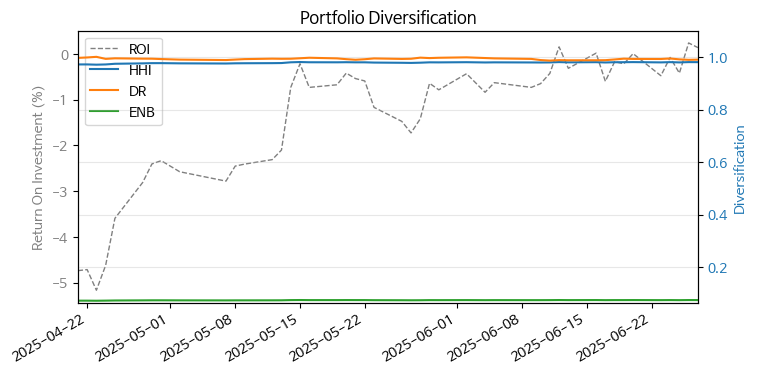

In [11]:
pf_tdf.diversification_history()

In [19]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-06-20, 48148612, -102859, 48255021, 3550, 7.37e-05


start    2024-06-19
end      2025-06-20
buy      48,148,612
sell       -102,859
value    48,255,021
ugl           3,550
roi        0.000074
dtype: object

In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
buy = {'K55105CH3411':5e6, 'K55223BU8809':5e6, 'K55301BX0493':5e6, 'K55235CI9634':5e6, 
       #'K55105BU7648':5e6,
       'K55213C50702':5.5e6, 'K55234DF3150':5.5e6}

_ = [print(f'{fund_names[k]}: {v:,.0f}') for k,v in buy.items()]

삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금): 5,000,000
KB유로인덱스40증권자투자신탁(채권혼합-파생형)C-퇴직e: 5,000,000
미래에셋차이나그로스증권자투자신탁 1(주식)종류C-P2e: 5,000,000
피델리티인디아증권자투자신탁(주식-재간접형)종류C-e: 5,000,000
한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금): 5,500,000
IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re: 5,500,000


In [15]:
# new buy
date_actual='2024-06-23'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    #buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
    buy = buy
)
_ = pf_tdf.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-27
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.0%, UGL: 11,231 (2025-06-27)


In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [16]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-06-27 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105CH3411             삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55223BU8809              KB유로인덱스40증권자투자신탁(채권혼합-파생형)C-퇴직e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55235CI9634                 피델리티인디아증권자투자신탁(주식-재간접형)종류C-e      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55301BX0493               미래에셋차이나그로스증권자투자신탁 1(주식)종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-27 K55101BV9571            0   6617554     NaN    0.083 2024-06-23  
           K55105CH3411      5000000   5000000     NaN    0.063 2024-06-23  
           K55206C95800            0   5155037  0.1429    0.065 2024-06-23  
           K55213C50702      5500000  10707882  0.1429    0.135 2024-06-23  
           K55214CD4825            0   6613508     NaN    0.083 2024-06-23  
           K55223BU8809      5000000   5000000     NaN    0.063 2024-06-23  
           K55234BY9966            0   4612179  0.1429    0.058 2024-06-23  
           K55234DF3150      5500000  10667054  0.1429    0.134 2024-06-23  
           K55235CI9634      5000000   5000000     NaN    0.063 2024-06-23  
           K55301BU6139            0   5206639  0.1429    0.065 2024-06-23  
           K55301BU6253            0   5145241  0.1429    0.065 2024-06-23  
           K55301BX0493      5000000   5000000     NaN    0.063 2024-06-23  
           K55364CF7048            0   4779673  0.1429    0.060 2024-06-23

In [17]:
pf_tdf.performance_stats()

,Realized,Simulated
start,2024-06-20,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.000973,0.268735
cagr,0.000955,0.111701
calmar,0.007199,1.577944
max_drawdown,-0.132689,-0.070789
avg_drawdown,-0.034474,-0.009319
avg_drawdown_days,48.285714,14.0
monthly_vol,0.048376,0.049534
monthly_sharpe,0.090124,2.112656


## HANA

In [22]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [23]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

28 securities from 2023-03-29 to 2025-06-24 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [15]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

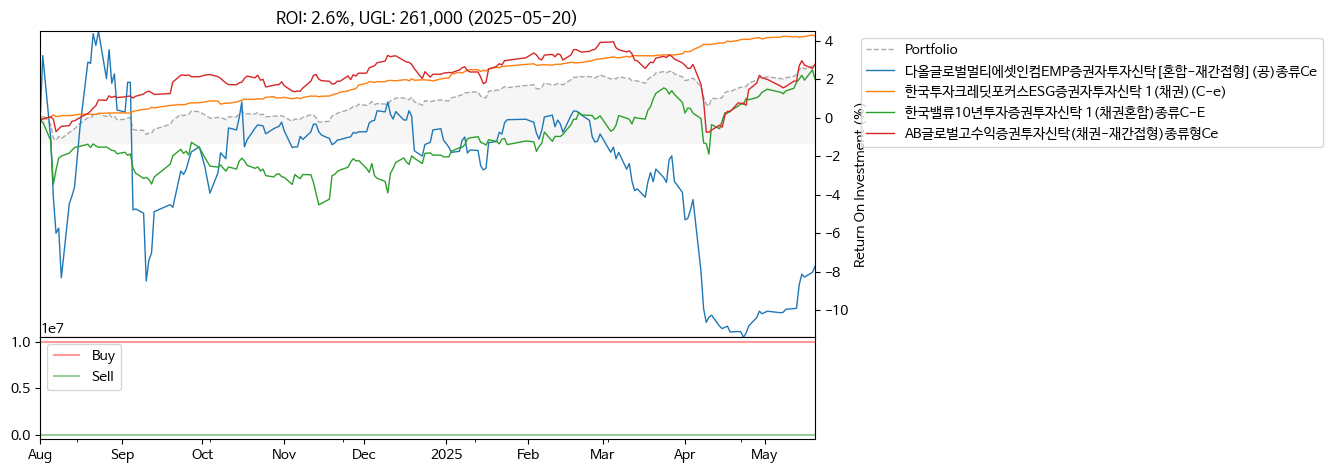

In [16]:
pf_hana.plot(total=False, roi=True)

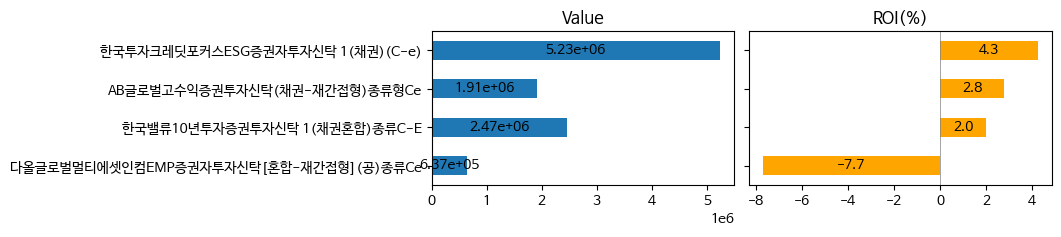

In [17]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

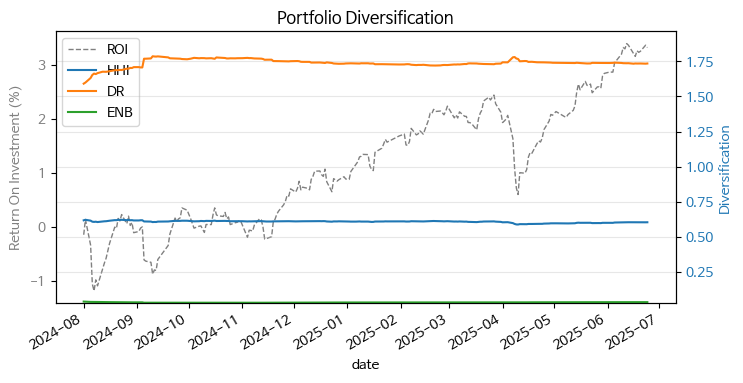

In [24]:
pf_hana.diversification_history()

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [90]:
pf = 'SAVE_2503'

In [91]:
kw_st = dict(
    #security_names = fund_names
)

In [92]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

32 securities from 2023-03-29 to 2025-06-27 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [22]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

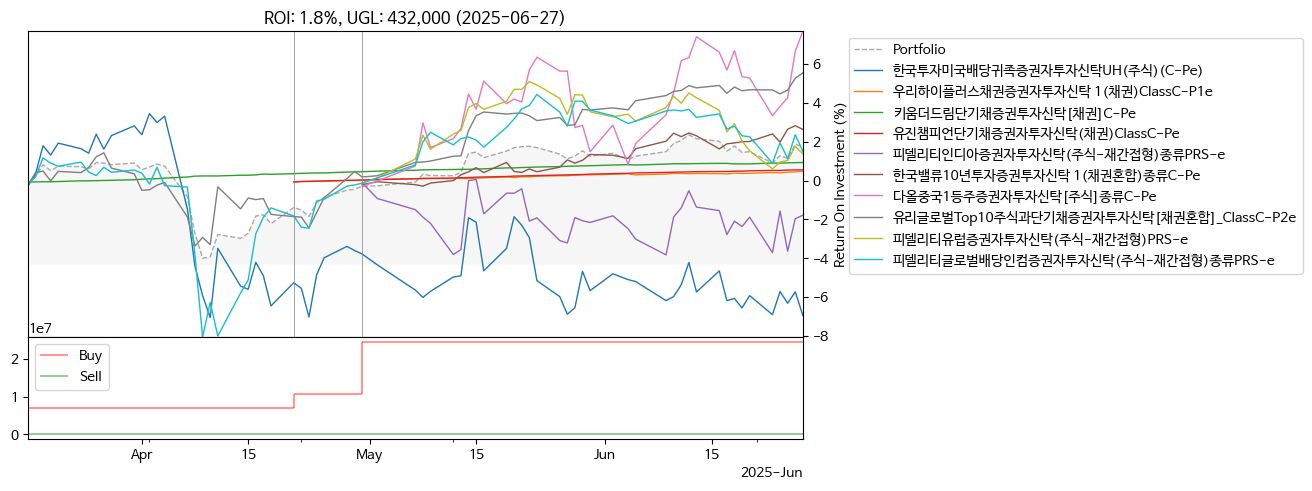

In [96]:
pf_save.plot(total=False, roi=True)

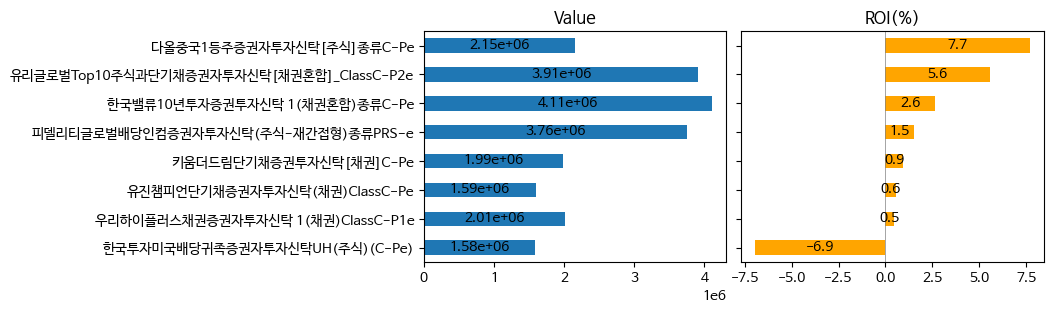

In [102]:
_ = pf_save.plot_assets(figsize=(8,3))

In [98]:
date = None
#pf_save.valuate(date, print_msg=True, join_str=True)
pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
K55307DH1659,유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e,2025-03-17,2025-06-27,3700000.0,-1308.208412,3906717,205408.791588,0.055516
K55306BT9453,다올중국1등주증권자투자신탁[주식]종류C-Pe,2025-04-30,2025-06-27,2000000.0,0.000000,2154178,154178.000000,0.077089
K55236BG3001,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-Pe,2025-04-30,2025-06-27,4000000.0,0.000000,4105668,105668.000000,0.026417
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,2025-03-17,2025-06-27,3700000.0,-936.899956,3757069,56132.100044,0.015171
KR5235AK9691,피델리티유럽증권자투자신탁(주식-재간접형)PRS-e,2025-04-30,2025-06-27,2000000.0,0.000000,2027657,27657.000000,0.013829
K55206C11278,키움더드림단기채증권투자신탁[채권]C-Pe,2025-03-17,2025-06-27,1967714.0,-439.616967,1986617,18463.383033,0.009383
K55107BU0252,우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e,2025-04-21,2025-06-27,2000000.0,-163.304785,2009800,9636.695215,0.004818
K55214B30803,유진챔피언단기채증권자투자신탁(채권)ClassC-Pe,2025-04-21,2025-06-27,1584916.0,-82.021806,1593794,8795.978194,0.005550
K55235B96163,피델리티인디아증권자투자신탁(주식-재간접형)종류PRS-e,2025-04-30,2025-06-27,2000000.0,0.000000,1964397,-35603.000000,-0.017802


In [62]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [100]:
date_actual='2024-06-18'

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    #buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 
           #'KR5236AS4818':4e6,
           #'K55101E95247':2e6,
           'K55306BT9453':2e6, 'K55236BG3001':4e6,
           #'K55235B96163':2e6, 'KR5235AK9691':2e6
          },
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-04-30
Ticker names of None updated
Set save=True to save transaction record
ROI: 2.1%, UGL: 440,255 (2025-06-27)


In [13]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [101]:
pf_save.view_record()

name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-30 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3001             한국밸류10년투자증권투자신탁 1(채권혼합)종류C-Pe      1   
           K55306BT9453                  다올중국1등주증권자투자신탁[주식]종류C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17  
2025-04-30 K55101D20874            0  1641013    0.25    0.080 2024-06-18  
           K55107BU0252            0  2002182     NaN    0.097 2024-06-18  
           K55206C11278            0  1978170    0.25    0.096 2024-06-18  
           K55214B30803            0  1586365     NaN    0.077 2024-06-18  
           K55236BG3001      4000000  4000000     NaN    0.194 2024-06-18  
           K55306BT9453      2000000  2000000     NaN    0.097 2024-06-18  
           K55307DH1659      2000000  3711149    0.25    0.180 2024-06-18  
           KR5235AK9808      2000000  3698267    0.25    0.179 2024-06-18

## FISA

In [25]:
kw_st = dict(
    method_select = 'selected'    
)

In [26]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

28 securities from 2023-03-29 to 2025-06-24 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_fisa_static_250604.csv loaded


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

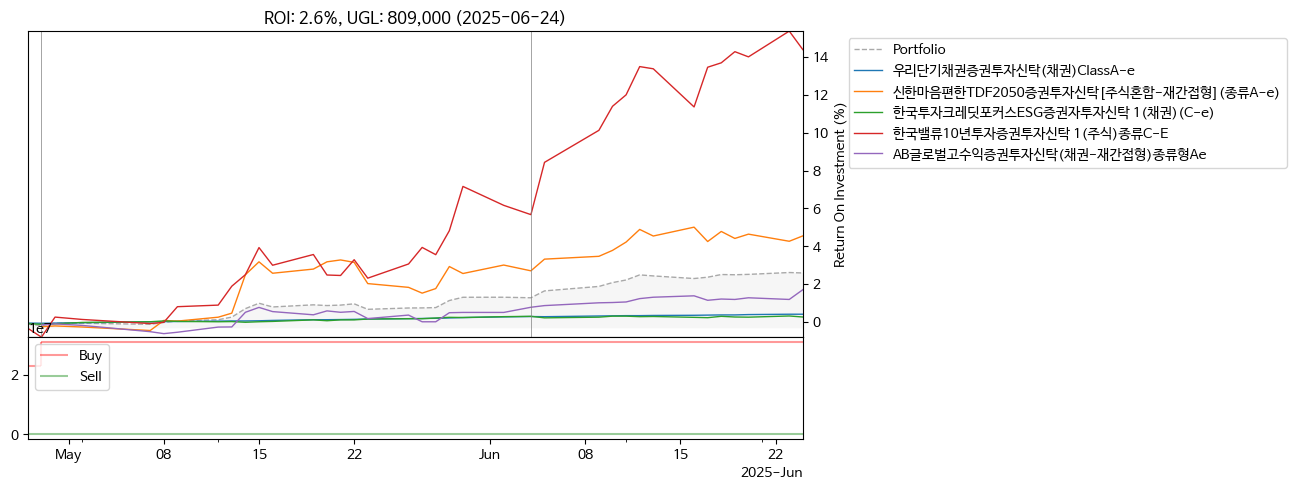

In [27]:
pf_fisa.plot(total=False, roi=True)

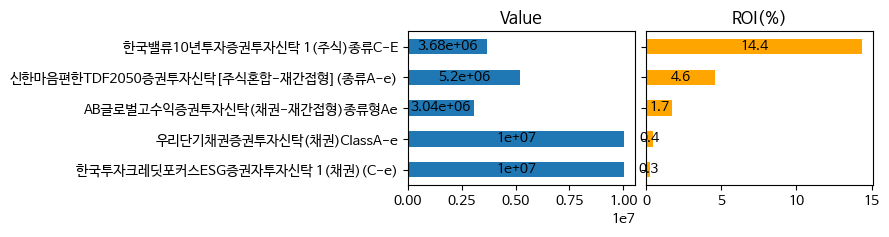

In [28]:
_ = pf_fisa.plot_assets(roi=True, figsize=(6,2))

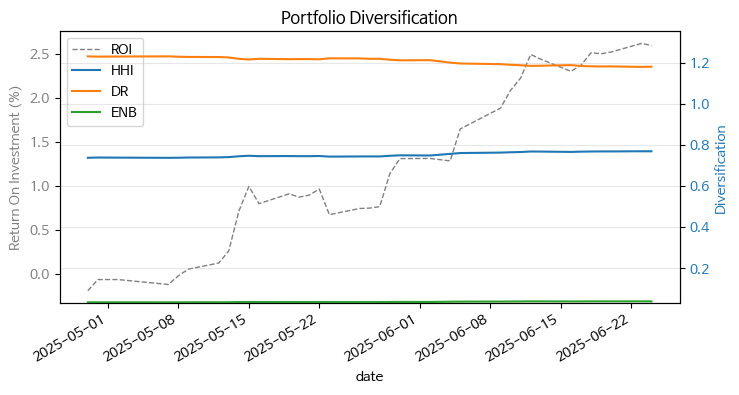

In [29]:
pf_fisa.diversification_history()

In [14]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-06-04, 30960600, -251.0, 31375223, 414372, 0.0134


start    2025-04-28
end      2025-06-04
buy      30,960,600
sell         -251.0
value    31,375,223
ugl         414,372
roi          0.0134
dtype: object

In [15]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
date_actual='2024-06-02'

# new buy
#tickers = ['K55210CO3737','KR5370AP9949']
#capital = [5e6, 3e6]
#capital = dict(zip(tickers, capital))

capital = {'KR5236AS4818': 215435}

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-04
All transactions saved to pf_fisa_static_250604.csv
ROI: 1.3%, UGL: 400,470 (2025-06-04)


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25  
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

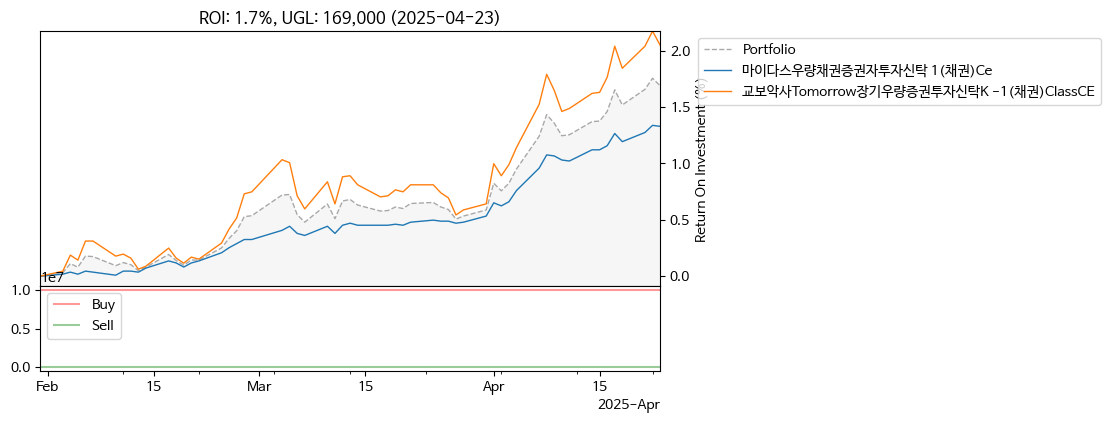

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

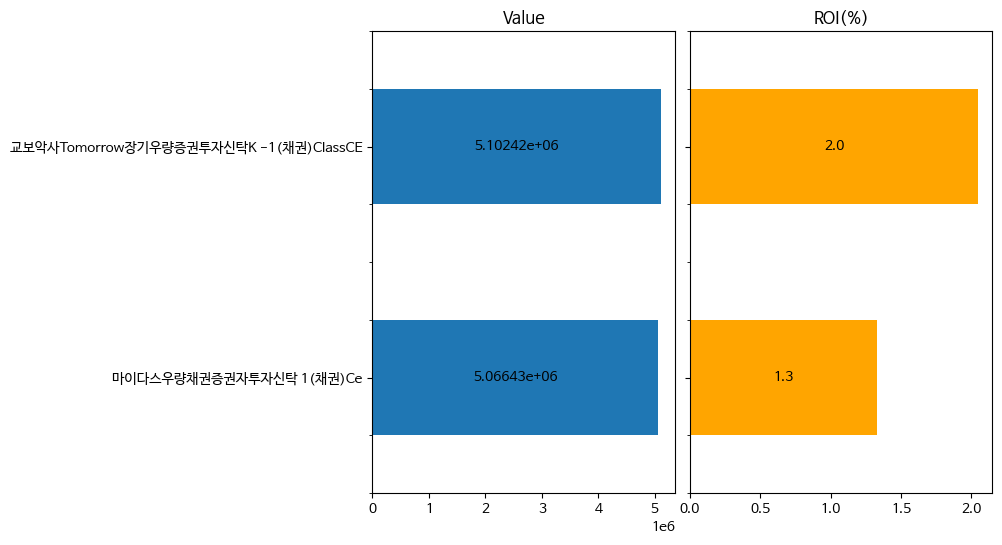

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [199]:
def performance(self, metrics=METRICS, fixed_weights=False, sort_by=None, exclude_cost=False):
    """
    calc performance of ideal portfolio excluding slippage
    """
    col_val = 'value'
    col_roi = 'roi'
    
    if fixed_weights:
        df_all = self.valuate(date=None, total=False, int_to_str=False, exclude_cost=exclude_cost)
        if df_all is None:
            return None
        df_rec = self._check_result()
        df_prices = self._update_universe(df_rec, msg=True, download_missing=True)
        if df_prices is None:
            return None
        # Compute the portfolio value by assuming the end-date weights were held from the start
        df_val = df_prices[df_all.index].dropna(how='all')
        df_val = (df_all[col_val].div(df_all[col_val].sum()) # weights
                 .div(df_val.iloc[0]) # unit price of each asset
                 .mul(df_val).sum(axis=1)) # total value
    else:
        df_all = self.valuate(date='all', total=True, exclude_cost=exclude_cost)
        if df_all is None:
            return None
        
        df_val = df_all[col_roi]
        # portfolio returns from cumulative roi
        df_val = (1 + df_val) / (1 + df_val.shift(1)) - 1
        # portfolio values from returns
        df_val = df_val.apply(lambda x: (1 + x)).cumprod().dropna()

    return performance_stats(df_val, metrics=metrics, sort_by=sort_by)

In [221]:
m2 = [
    'total_return', 'cagr', 'calmar', 
    'max_drawdown', 'avg_drawdown', 'avg_drawdown_days', 
    'monthly_vol', 'monthly_sharpe', 'monthly_sortino',
    'yearly_vol', 'yearly_sharpe', 'yearly_sortino'
]


def performance(self, date=None, metrics=m2, sort_by=None, exclude_cost=False):
    """
    calc performance of a portfolio with 2 different methods
    date: date for fixed weights of simulated performance
    """
    col_val = 'value'
    col_roi = 'roi'
    
    # Portfolio value from actual returns
    df_all = self.valuate(date='all', total=True, exclude_cost=exclude_cost)
    if df_all is None:
        return None
    
    df_val = df_all[col_roi]
    # portfolio returns from cumulative roi
    df_val = (1 + df_val) / (1 + df_val.shift(1)) - 1
    # portfolio values from returns
    df_res = df_val.apply(lambda x: (1 + x)).cumprod().dropna()
    
    # Portfolio value by assuming the end-date weights were held from the start
    df_all = self.valuate(date=date, total=False, int_to_str=False, exclude_cost=exclude_cost)
    if df_all is None:
        return None
    df_rec = self._check_result()
    df_prices = self._update_universe(df_rec, msg=True, download_missing=True)
    if df_prices is None:
        return None
    df_val = df_prices.loc[:date, df_all.index].dropna(how='all')
    df_val = (df_all[col_val].div(df_all[col_val].sum()) # weights
             .div(df_val.iloc[0]) # unit price of each asset
             .mul(df_val).sum(axis=1)) # total value

    df_res = df_res.to_frame('Realized').join(df_val.rename('Simulated'), how='outer')

    return performance_stats(df_res, metrics=metrics, sort_by=sort_by, align_period=False)

In [222]:
performance(pf_tdf, fixed_weights=False, date='2025-04-21')

,Realized,Simulated
start,2024-06-20,2023-03-29
end,2025-06-27,2025-04-21
total_return,0.002223,0.191337
cagr,0.002183,0.08851
calmar,0.016449,1.075671
max_drawdown,-0.132689,-0.082284
avg_drawdown,-0.034474,-0.008016
avg_drawdown_days,48.285714,12.040816
monthly_vol,0.047653,0.063447
monthly_sharpe,0.117005,1.317537


In [223]:
performance(pf_tdf, fixed_weights=False)

,Realized,Simulated
start,2024-06-20,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.002223,0.255078
cagr,0.002183,0.106362
calmar,0.016449,1.273103
max_drawdown,-0.132689,-0.083545
avg_drawdown,-0.034474,-0.008181
avg_drawdown_days,48.285714,13.729167
monthly_vol,0.047653,0.053495
monthly_sharpe,0.117005,1.874105


In [214]:
pf_tdf.record

name  ratio  \
date       ticker                                                             
2024-06-19 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight      date*  price  
date       ticker                                                        
2024-06-19 K55206C95800      5000000  5000000  0.5000 2024-06-19    NaN  
           K55301BU6139      5000000  5000000  0.5000 2024-06-19    NaN  
2025-01-15 K55206C95800            0  5077506  0.1429 2025-01-15    NaN  
           K55213C50702      5000000  5000000  0.1429 2025-01-15    NaN  
           K55234BY9966      5000000  5000000  0.1429 2025-01-15    NaN  
           K55234DF3150      5000000  5000000  0.1429 2025-01-15    NaN  
           K55301BU6139            0  5077009  0.1429 2025-01-15    NaN  
           K55301BU6253      5000000  5000000  0.1429 2025-01-15    NaN  
           K55364CF7048      5000000  5000000  0.1429 2025-01-15    NaN  
2025-04-21 K55101BV9571      6574306  6574306     NaN 2025-04-21    NaN  
           K55206C95800            0  4899682  0.1429 2024-04-17    NaN  
           K55213C50702            0  4823143  0.1429 2024-04-17    NaN  
           K55214CD4825      6574306  6574306     NaN 2025-04-21    NaN  
           K55234BY9966            0  4260709  0.1429 2024-04-17    NaN  
           K55234DF3150            0  4865649  0.1429 2024-04-17    NaN  
           K55301BU6139            0  4837744  0.1429 2024-04-17    NaN  
           K55301BU6253            0  4712837  0.1429 2024-04-17    NaN  
           K55364CF7048            0  4595360  0.1429 2024-04-17    NaN

In [50]:
pm.util_performance_by_asset()

security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


,name,start,end,buy,sell,value,ugl,roi,portfolio
ticker,,,,,,,,,
012450,한화에어로스페이스,2024-08-22,2025-06-27,8.880965e+06,8.696757e+06,3553332.0,3.369124e+06,0.379365,MMT_2407
003230,삼양식품,2024-07-22,2025-06-16,4.577833e+06,6.762558e+06,0.0,2.184725e+06,0.477240,MMT_2407
064350,현대로템,2024-11-11,2025-06-27,6.725405e+06,4.726105e+06,4012471.0,2.013171e+06,0.299338,MMT_2407
329180,HD현대중공업,2025-04-16,2025-06-27,3.359878e+06,0.000000e+00,3790887.0,4.310093e+05,0.128281,MMT_2407
267260,HD현대일렉트릭,2024-07-22,2025-04-15,3.560870e+06,3.908809e+06,NaN,3.479383e+05,0.097712,MMT_2407
...,...,...,...,...,...,...,...,...,...
411060,ACE KRX금현물,2024-12-18,2025-06-27,1.637691e+06,0.000000e+00,1806895.0,1.692039e+05,0.103319,WTR_2412
284430,KODEX 200미국채혼합,2024-12-18,2025-06-27,1.801904e+06,0.000000e+00,1938999.0,1.370948e+05,0.076083,WTR_2412
273130,KODEX 종합채권(AA-이상)액티브,2024-12-18,2025-06-27,1.761986e+06,0.000000e+00,1781165.0,1.917916e+04,0.010885,WTR_2412


In [51]:
pm.summary()

portfolio,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18
end,2025-06-27,2025-06-27,2025-06-27,2025-06-27,2025-06-27,2025-06-27
buy,"69,808,056","16,472,520","17,985,321","10,364,836","10,516,562","125,147,296"
sell,"56,214,884","2,617,050",0.0,"942,797",0.0,"59,774,732"
value,"19,024,302","19,261,650","22,912,614","10,606,808","11,216,796","83,022,170"
ugl,"5,431,130","5,406,180","4,927,293","1,184,770","700,234","17,649,606"
roi,0.0778,0.328,0.274,0.114,0.0666,0.141


In [53]:
def summary(self, *pf_names, date=None, 
            int_to_str=True, category=None, exclude_cost=False, sort_by=None, 
            plot=False, roi=True, figsize=None):
    """
    get cashflow & pnl of groups in category (default portfolio) on date
    """       
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
    # history not supported in summary
    date = None if date == 'all' else date
    nms_v = self.names_vals
    nm_ttl = nms_v['ttl']
    nm_start = nms_v['start']
    nm_end = nms_v['end']
    nm_roi = nms_v['roi']
    nm_ugl = nms_v['ugl']
    nm_buy = nms_v['buy']

    df_val = self._valuate(*pf_names, date=date, category=category, exclude_cost=exclude_cost)
    return df_val
    
    if plot:
        category = df_val.index.name # reset category according to result df_val
        df_val = df_val.reset_index()
        df_val = df_val.sort_values(sort_by, ascending=True) if sort_by in df_val.columns else df_val
        axes = PortfolioBuilder._plot_assets(df_val, col_name=category, roi=roi, figsize=figsize)
        return None
    else:
        # set total
        df_val = df_val.T
        df_val[nm_ttl] = [df_val.loc[nm_start].min(), df_val.loc[nm_end].max(), 
                             *df_val.iloc[2:].sum(axis=1).to_list()]
        df_ttl = df_val[nm_ttl]
        df_val.loc[nm_roi, nm_ttl] = df_ttl[nm_ugl] / df_ttl[nm_buy]
        return df_val.map(format_price, digits=0) if int_to_str else df_val

In [54]:
summary(pm)

,start,end,buy,sell,value,ugl,roi
portfolio,,,,,,,
MMT_2407,2024-07-22,2025-06-27,6.980806e+07,5.621488e+07,19024302.0,5.431130e+06,0.077801
PER_2410,2024-10-17,2025-06-27,1.647252e+07,2.617050e+06,19261650.0,5.406180e+06,0.328194
PER_2505,2025-05-09,2025-06-27,1.798532e+07,0.000000e+00,22912614.0,4.927293e+06,0.273962
WTR_2407,2024-07-18,2025-06-27,1.036484e+07,9.427974e+05,10606808.0,1.184770e+06,0.114307
WTR_2412,2024-12-18,2025-06-27,1.051656e+07,0.000000e+00,11216796.0,7.002336e+05,0.066584


In [22]:
from pf_utils import METRICS2

def performance_stats(self, *pf_names, date=None, column='Realized',
                      metrics=METRICS, sort_by=None, exclude_cost=False):
    """
    compare performance stats of portfolios with 2 different methods
    date: date for fixed weights of simulated performance
    column: 'Realized' for stats of actual portfolio,
            'Simulated' for stats of portfolios by assuming the end-date weights were held from the start;
                Meaningful for portfolios with long-term rebalancing periods
            see ProtfolioBuilder.performance_stats for details
    """
    # check portfolios
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
        
    # get data from each portfolio
    df_all = None
    no_res = []
    for name in pf_names:
        pf = self.portfolios[name]
        df = pf.performance_stats(date=date, metrics=metrics, exclude_cost=False)
        if df is None:
            no_res.append(name)
        else:
            # add portfolio name
            df = df[column].rename(name)
            df_all = df if df_all is None else pd.concat([df_all, df], axis=1) 
    print(f"WARNING: Check portfolios {', '.join(no_res)}") if len(no_res) > 0 else None
    return df_all

In [43]:
import pandas as pd

performance_stats(pm, 'MMT_2407', 'PER')
#performance_stats(pm)

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe


,MMT_2407,PER_2410,PER_2505
start,2024-07-23,2024-10-18,2025-05-12
end,2025-06-27,2025-06-27,2025-06-27
total_return,0.021219,0.320764,0.228541
cagr,0.02288,0.496665,4.125938
calmar,0.075958,5.588958,193.86191
max_drawdown,-0.301226,-0.088865,-0.021283
avg_drawdown,-0.106053,-0.020958,-0.011806
avg_drawdown_days,109.666667,8.952381,3.125
daily_vol,0.278361,0.212148,0.284936
daily_sharpe,0.227265,2.085798,5.842883


In [26]:
pm.summary('MMT_2407', 'TDF_2406')

ERROR: No portfolio such as TDF_2406
Portfolios available: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [42]:
pf_names = ['MMT_2407', 'PER']
pm.check_portfolios(*pf_names, loading=False)

['MMT_2407', 'PER_2410', 'PER_2505']

In [48]:
def check_portfolios(self, *pf_names, loading=False):
    """
    check if portfolios exist 
    pf_names: list of portfolios as name or prefix 
    """
    if loading:
        pf_all = self.pf_data.portfolios.keys()
    else:
        pf_all = self.portfolios.keys()

    if len(pf_names) == 0:
        pf_names = pf_all
    else:
        #return pf_names, pf_all
        out = [x for x in pf_names for y in pf_all if y.startswith(x)]
        out = set(pf_names)-set(out)
        if len(out) > 0:
            print_list(out, 'ERROR: No portfolio such as {}')
            #p = PortfolioManager.review('portfolio', output=True)
            print_list(pf_all, 'Portfolios available: {}')
            pf_names = list()
        else:
            pf_names = [y for x in pf_names for y in pf_all if y.startswith(x)]
    return pf_names

In [52]:
from pf_utils import print_list
pf_names = ['MMT', 'WTR']
res = check_portfolios(pm, *pf_names, loading=False)
res

['MMT_2407', 'WTR_2407', 'WTR_2412']

In [38]:
pf_names, pf_all = res
out = [x for x in pf_names for y in pf_all if y.startswith(x)]
out

['MMT']

In [39]:
pf_names

('MMT', 'TDF')

In [40]:
pf_all

dict_keys(['MMT_2407', 'PER_2410', 'PER_2505', 'WTR_2407', 'WTR_2412'])

In [53]:
from pf_utils import PortfolioManager
PortfolioManager.review('portfolio', output=False)

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [55]:
pm.pf_data.portfolios.keys()

dict_keys(['MMT_2407', 'PER_2410', 'PER_2505', 'WTR_2407', 'WTR_2412', 'LIQ', 'TDF_2406', 'HANA_2408', 'SAVE_2503', 'FISA_2504', 'FCTR'])

In [15]:
def summary(self, *pf_names, date=None, 
            int_to_str=True, category=None, exclude_cost=False, sort_by=None, 
            plot=False, roi=True, figsize=None):
    """
    get cashflow & pnl of groups in category (default portfolio) on date
    """       
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
    # history not supported in summary
    date = None if date == 'all' else date
    nms_v = self.names_vals
    nm_ttl = nms_v['ttl']
    nm_start = nms_v['start']
    nm_end = nms_v['end']
    nm_roi = nms_v['roi']
    nm_ugl = nms_v['ugl']
    nm_buy = nms_v['buy']

    df_val = self._valuate(*pf_names, date=date, category=category, exclude_cost=exclude_cost)
    return df_val
    if plot:
        category = df_val.index.name # reset category according to result df_val
        df_val = df_val.reset_index()
        return df_val
        df_val = df_val.sort_values(sort_by, ascending=True) if sort_by in df_val.columns else df_val
        axes = PortfolioBuilder._plot_assets(df_val, col_name=category, roi=roi, figsize=figsize)
        return df_val
        return None
    else:
        # set total
        df_val = df_val.T
        df_val[nm_ttl] = [df_val.loc[nm_start].min(), df_val.loc[nm_end].max(), 
                             *df_val.iloc[2:].sum(axis=1).to_list()]
        df_ttl = df_val[nm_ttl]
        df_val.loc[nm_roi, nm_ttl] = df_ttl[nm_ugl] / df_ttl[nm_buy]
        return df_val.map(format_price, digits=0) if int_to_str else df_val

In [28]:
from pf_utils import PortfolioBuilder

def _valuate(self, *pf_names, date=None, category=None, exclude_cost=False, format_date='%Y-%m-%d'):
    """
    return evaluation summary df the portfolios in pf_names
    pf_names: list of portfolio names
    date: date for values on date, None for values on last date, 'all' for history
    """
    df_cat = self.df_category
    col_portfolio = self.col_portfolio
    col_ticker = self.col_ticker
    nms_v = self.names_vals
    nm_val = nms_v['value']
    nm_sell = nms_v['sell']
    nm_buy = nms_v['buy']
    nm_start = nms_v['start']
    nm_end = nms_v['end']
    nm_date = nms_v['date']

    # get data from each portfolio
    df_all = self._performance_by_asset(*pf_names, date=date, exclude_cost=exclude_cost)

    # set custom category
    if date != 'all':
        # check category
        category = category or col_portfolio
        if category not in df_all.columns:
            if (df_cat is not None) and category in df_cat.columns:
                if len(df_cat.index.names) > 1: # index of df_cat is (ticker, portfolio)
                    df_all = (df_all.set_index(self.col_portfolio, append=True)
                              .join(df_cat[category]).reset_index(self.col_portfolio))
                else:
                    df_all = df_all.join(df_cat[category])
            else:
                print(f'WARNING: Reset category to {col_portfolio} as no {category} exists in the category')
                category = col_portfolio
        # construct result according to category
        sr_start = df_all.groupby(category)[nm_start].min().dt.strftime(format_date)
        sr_end = df_all.groupby(category)[nm_end].max().dt.strftime(format_date)
        cols = [nm_buy, nm_sell, nm_val]
        df_all = sr_start.to_frame().join(sr_end).join(df_all.groupby(category)[cols].sum())
        # add profit columns
        df_prf = PortfolioBuilder.calc_profit(df_all, result='both', 
                                     col_val=nm_val, col_sell=nm_sell, col_buy=nm_buy)
        return pd.concat([df_all, df_prf], axis=1)
    else:
        return df_all.set_index(col_portfolio, append=True).sort_index()

In [29]:
pfs = pm.portfolios.keys()
pfs

dict_keys(['TDF_2406', 'HANA_2408', 'SAVE_2503', 'FISA_2504'])

In [31]:
import pandas as pd
_valuate(pm, *pfs, date=None)

,start,end,buy,sell,value,ugl,roi
portfolio,,,,,,,
FISA_2504,2025-04-28,2025-06-27,31176035.0,-14161.200268,32180480,990283.799732,0.031764
HANA_2408,2024-08-01,2025-06-27,9990000.0,0.000000,10364483,374483.000000,0.037486
SAVE_2503,2025-03-17,2025-06-27,10652630.0,-3481.020945,10697925,41813.979055,0.003925
TDF_2406,2024-06-19,2025-06-27,48148612.0,-102861.458051,48318437,66963.541949,0.001391
